#### Arbitrary value imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models.

Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value. Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

**Which variables can I impute with an arbitrary value?**

Both categorical and numerical variables can be imputed by arbitrary values.

For categorical variables, this is the equivalent of replacing all instances of NA by an additional label, which is very common practice.

**Assumptions**
- Data is not missing at random.

If this is the case, we want to flag the missing values with a different (arbitrary) value, instead of replacing those occurrences with the mean or the median, which represent the most common value.

**Advantages**
- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)
- Captures the importance of "missingness" if there is one

**Limitations**

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset
- If the arbitrary value is at the end of the distribution it may mask or create outliers
- Need to be careful not to chose an arbitrary value too similar to the mean or median (or any other common value of the variable distribution)

**When to use arbitrary value imputation**

Replacing the NA by arbitrary values should be used when there are reasons to believe that the NA are not missing at random. In situations like this, we would not like to replace with the median or the mean, and therefore make the NA look like the majority of our observations. Instead, we want to flag the fact that the observation is missing.

This approach is used widely both in organisations and in Kaggle competitions. It consists of replacing the NA by an arbitrary value. Any of your creation, but ideally different from the median/mean/mode, and not within the normal values of the variable.

The problem consists in deciding which arbitrary value to choose.

**Note**
When variables are captured by third parties, like credit agencies, they place arbitrary numbers already to signal the fact that the value for that observation is missing. So arbitrary value imputation is also common practice in real life data collections.

Datasets: Titanic and house price 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split


In [2]:
# load the dataset
use_columns = ['age', 'fare', 'survived']

data = pd.read_csv("../datasets/titanic.csv", usecols=use_columns)

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [4]:

X_train, X_test, y_train, y_test = train_test_split(
        data[['age', 'fare']],  # predictors
        data.survived,  # target
        test_size=0.3,  # percentage of obs in test set
        random_state=0
    )


In [6]:
X_train.isnull().sum()

age     175
fare      0
dtype: int64

In [7]:
X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [8]:
def impute_na(df, variable, value):
    return df[variable].fillna(value)
    

C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


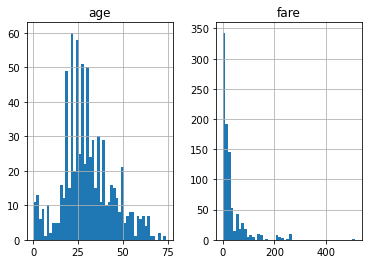

In [9]:
X_train.hist(bins=50)
plt.show()

In [10]:
# For this demo I will replace NA by 2 different arbitrary values
# one at the far right end of the distribution ==> 99
# and alternatively by -1, taking advantage that Age takes only positive values

# first replace with 99
X_train['Age_99'] = impute_na(X_train, 'age', 99)

# now replace with -1
X_train['Age_minus1'] = impute_na(X_train, 'age', -1)

X_train.head(15)

,age,fare,Age_99,Age_minus1
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,99.0,-1.0
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,99.0,-1.0
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Age_99'}>],
       [<AxesSubplot:title={'center':'Age_minus1'}>, <AxesSubplot:>]],
      dtype=object)

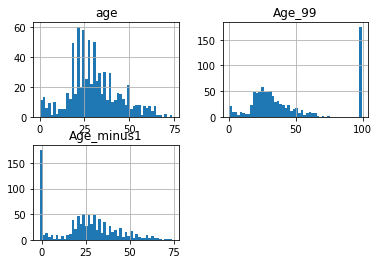

In [13]:
X_train[['age', 'Age_99', 'Age_minus1']].hist(bins=50)

In [14]:
# we can see a change in the variance after arbitrary value imputation
# this is expected, because the percentage of missing data is quite
# high in Age ~20%

print('Original variable variance: ', X_train['age'].var())
print('Variance after 99 imputation: ', X_train['Age_99'].var())
print('Variance after -1 imputation: ', X_train['Age_minus1'].var())

Original variable variance:  194.16304666581863
Variance after 99 imputation:  888.7051993280913
Variance after -1 imputation:  307.94005269387753


In fact, the effect on the variance will also be driven by the magnitude of the arbitrary value selected for the imputation, compare 99 with -1.


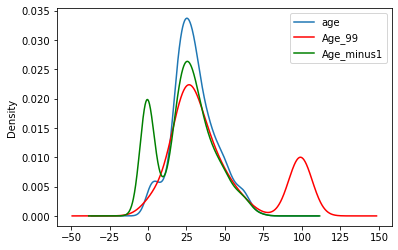

In [15]:
# we can see that the distribution has changed 
# with now more values accumulating towards the arbitrary values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with 99
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')